# Hey README! THIS IS OPENING!
Hey there, fellow data enthusiasts! Today, I'm excited to dive into some fun analysis of US airport data! We've got two datasets on our hands: one for flights and the other for passengers. The goal of this analysis is primary two: **to know the busiest airport** and **total flights/passengers per year**, but we will expand our analysis to get another insights!


Now, both datasets have this cool column called **"Total"**, but here's the thing: in the flights data, it represents the total number of flights, while in the passengers data, it represents the total number of passengers. Pretty straightforward, right? So, let's have a blast analyzing these datasets together! Feel free to jump in with any ideas or questions you have along the way. Let's rock this data adventure! 🚀📊

But, Before we embark on this exciting data journey, let's make sure we have our trusty libraries by our side: pandas and matplotlib. We'll be using pandas to wrangle and analyze our data, and matplotlib to create some cool visualizations. Let's import these libraries and get ready to have some fun!

In [1]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
# Define dataframe for Flight and Passengers
df_1 = pd.read_csv('/kaggle/input/us-international-air-traffic-data/International_Report_Departures.csv')
df_2 = pd.read_csv('/kaggle/input/us-international-air-traffic-data/International_Report_Passengers.csv')

# **Data Cleaning**

In [2]:
# Check Missing Values
df_1.isnull().sum()

data_dte           0
Year               0
Month              0
usg_apt_id         0
usg_apt            0
usg_wac            0
fg_apt_id          0
fg_apt             0
fg_wac             0
airlineid          0
carrier         3055
carriergroup       0
type               0
Scheduled          0
Charter            0
Total              0
dtype: int64

In [3]:
# Check Missing Values
df_2.isnull().sum()

data_dte           0
Year               0
Month              0
usg_apt_id         0
usg_apt            0
usg_wac            0
fg_apt_id          0
fg_apt             0
fg_wac             0
airlineid          0
carrier         2797
carriergroup       0
type               0
Scheduled          0
Charter            0
Total              0
dtype: int64

We've noticed that the "carrier" column has a significant number of missing values. However, since the "carrier" column represents the airplane code and it's not necessary for our goal of gaining insights, we can leave it as is. Let's move forward with our analysis without worrying about it. 🛫💼

In [4]:
# Sort data based on date
df_1 = df_1.sort_values('data_dte', ascending=True)
df_1 = df_1.reset_index(drop=True)
# Change index to positive integer
df_1.index = df_1.index+1
df_2 = df_2.sort_values('data_dte', ascending=True)
df_2 = df_2.reset_index(drop=True)
df_2.index = df_2.index+1

Alrighty, let's take a peek at our data and see what we're working with

In [5]:
# Show top ten df_1 flights table
df_1.head(10)

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
1,01/01/1990,1990,1,12478,JFK,22,10920,CDG,427,20384,PA,1,Departures,62,0,62
2,01/01/1990,1990,1,12478,JFK,22,15306,TPE,781,19544,CI,0,Departures,22,0,22
3,01/01/1990,1990,1,14683,SAT,74,13252,MEX,148,19559,MX,0,Departures,61,0,61
4,01/01/1990,1990,1,14122,PIT,23,16217,YUL,941,20355,US,1,Departures,2,0,2
5,01/01/1990,1990,1,11630,FAI,1,11170,CTS,736,19950,9R,1,Departures,0,1,1
6,01/01/1990,1990,1,13303,MIA,33,14153,PLS,281,19685,TPQ,1,Departures,0,2,2
7,01/01/1990,1990,1,13303,MIA,33,10386,ASU,365,19812,LBQ,1,Departures,0,1,1
8,01/01/1990,1990,1,12266,IAH,74,12010,GUA,127,19522,GU,0,Departures,62,0,62
9,01/01/1990,1990,1,14635,RSW,33,16271,YYZ,936,19523,CP,0,Departures,0,36,36
10,01/01/1990,1990,1,13303,MIA,33,12051,GYE,337,19839,EH,0,Departures,59,0,59


In [6]:
# Show top ten df_2 flights table
df_2.head(10)

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
1,01/01/1990,1990,1,13303,MIA,33,15606,VLC,482,19534,AM,0,Passengers,248,0,248
2,01/01/1990,1990,1,10299,ANC,1,13744,NRT,736,19529,SN,0,Passengers,3854,0,3854
3,01/01/1990,1990,1,12173,HNL,2,16257,YYC,916,19523,CP,0,Passengers,9761,0,9761
4,01/01/1990,1990,1,13303,MIA,33,11868,GCM,233,19707,EA,1,Passengers,2736,0,2736
5,01/01/1990,1990,1,10821,BWI,35,13605,NAS,204,19952,KW,1,Passengers,653,0,653
6,01/01/1990,1990,1,11298,DFW,74,13252,MEX,148,19554,LH,0,Passengers,6418,0,6418
7,01/01/1990,1990,1,12173,HNL,2,10619,BIK,832,19746,GA,0,Passengers,5045,0,5045
8,01/01/1990,1990,1,10299,ANC,1,10920,CDG,427,19532,AF,0,Passengers,6624,0,6624
9,01/01/1990,1990,1,12889,LAS,85,16042,YEG,916,19829,KI,0,Passengers,0,1002,1002
10,01/01/1990,1990,1,11697,FLL,33,16217,YUL,941,19506,ND,0,Passengers,0,238,238


In [7]:
# Filtering 2020 from the data since it's only January
df_1 = df_1[df_1['Year']!=2020]
df_2 = df_2[df_2['Year']!=2020]
# Change 1 and 0 from column carriergroup to domestic and foreign
df_1['carriergroup'] = df_1['carriergroup'].replace({1: 'domestic', 0: 'foreign'})
df_2['carriergroup'] = df_2['carriergroup'].replace({1: 'domestic', 0: 'foreign'})

# **Data Analysis**
alright, let's analyze the data!

In [8]:
# Show top ten updated df_1 flights table
df_1.head(10)

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
1,01/01/1990,1990,1,12478,JFK,22,10920,CDG,427,20384,PA,domestic,Departures,62,0,62
2,01/01/1990,1990,1,12478,JFK,22,15306,TPE,781,19544,CI,foreign,Departures,22,0,22
3,01/01/1990,1990,1,14683,SAT,74,13252,MEX,148,19559,MX,foreign,Departures,61,0,61
4,01/01/1990,1990,1,14122,PIT,23,16217,YUL,941,20355,US,domestic,Departures,2,0,2
5,01/01/1990,1990,1,11630,FAI,1,11170,CTS,736,19950,9R,domestic,Departures,0,1,1
6,01/01/1990,1990,1,13303,MIA,33,14153,PLS,281,19685,TPQ,domestic,Departures,0,2,2
7,01/01/1990,1990,1,13303,MIA,33,10386,ASU,365,19812,LBQ,domestic,Departures,0,1,1
8,01/01/1990,1990,1,12266,IAH,74,12010,GUA,127,19522,GU,foreign,Departures,62,0,62
9,01/01/1990,1990,1,14635,RSW,33,16271,YYZ,936,19523,CP,foreign,Departures,0,36,36
10,01/01/1990,1990,1,13303,MIA,33,12051,GYE,337,19839,EH,foreign,Departures,59,0,59


In [9]:
# Show top ten updated df_2 flights table
df_2.head(10)

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
1,01/01/1990,1990,1,13303,MIA,33,15606,VLC,482,19534,AM,foreign,Passengers,248,0,248
2,01/01/1990,1990,1,10299,ANC,1,13744,NRT,736,19529,SN,foreign,Passengers,3854,0,3854
3,01/01/1990,1990,1,12173,HNL,2,16257,YYC,916,19523,CP,foreign,Passengers,9761,0,9761
4,01/01/1990,1990,1,13303,MIA,33,11868,GCM,233,19707,EA,domestic,Passengers,2736,0,2736
5,01/01/1990,1990,1,10821,BWI,35,13605,NAS,204,19952,KW,domestic,Passengers,653,0,653
6,01/01/1990,1990,1,11298,DFW,74,13252,MEX,148,19554,LH,foreign,Passengers,6418,0,6418
7,01/01/1990,1990,1,12173,HNL,2,10619,BIK,832,19746,GA,foreign,Passengers,5045,0,5045
8,01/01/1990,1990,1,10299,ANC,1,10920,CDG,427,19532,AF,foreign,Passengers,6624,0,6624
9,01/01/1990,1990,1,12889,LAS,85,16042,YEG,916,19829,KI,foreign,Passengers,0,1002,1002
10,01/01/1990,1990,1,11697,FLL,33,16217,YUL,941,19506,ND,foreign,Passengers,0,238,238


Let's analyze the data by year since we have a large number of rows. 📅🔍

In [10]:
# Show total flights per year
df_1_year = df_1.groupby('Year')['Total'].sum()
# Show table 
df_1_year

Year
1990     683399
1991     701843
1992     784967
1993     820376
1994     844760
1995     913350
1996     943039
1997     983723
1998    1082878
1999    1116846
2000    1198699
2001    1192116
2002    1186081
2003    1316455
2004    1408786
2005    1453344
2006    1482477
2007    1518663
2008    1499268
2009    1399579
2010    1450964
2011    1476679
2012    1509105
2013    1532238
2014    1581395
2015    1626089
2016    1687607
2017    1735518
2018    1793447
2019    1808369
Name: Total, dtype: int64

In [11]:
# Get Statistical Summary of the data
df_1_year.describe()

count    3.000000e+01
mean     1.291069e+06
std      3.361052e+05
min      6.833990e+05
25%      1.008512e+06
50%      1.404182e+06
75%      1.516274e+06
max      1.808369e+06
Name: Total, dtype: float64

As we can see, the data has a standard deviation of approximately **3*10^5**. That's quite a spread, huh? It means that the values in our dataset **vary a lot from the average**. But hey, that's what makes data analysis fun, right? We get to uncover all sorts of interesting and unexpected patterns. So, let's roll up our sleeves and dive deeper into this fascinating world of data! We're ready to rock this analysis! 📊🎉

Let's visualize the total flights!

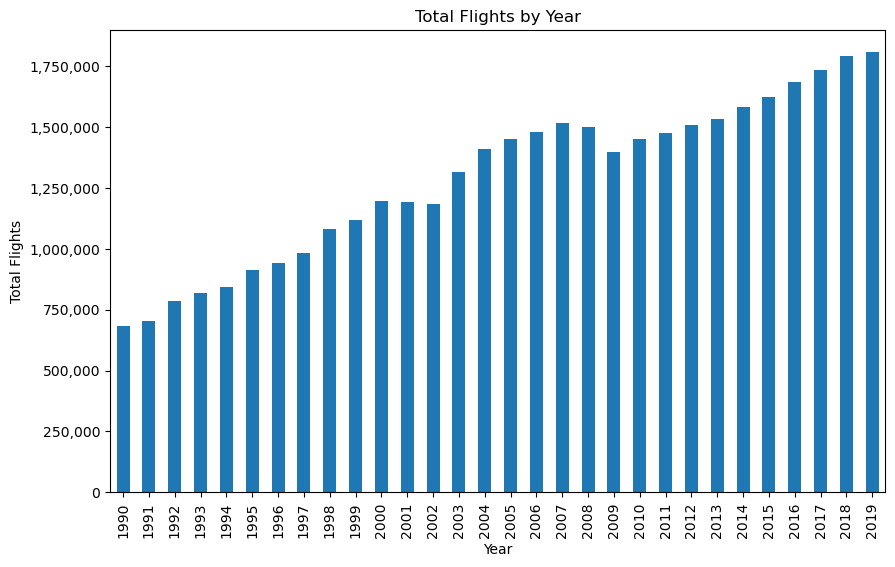

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
df_1_year.plot(kind='bar', ax=ax)

# Set the y-axis tick label format to standard decimal notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.xlabel('Year')
plt.ylabel('Total Flights')
plt.title('Total Flights by Year')
plt.show()


alright, let's jump in into second dataset, passengers data. Let's do the same like previous data.

In [13]:
# Show total Passengers per year
df_2_year = df_2.groupby('Year')['Total'].sum()
# Show table 
df_2_year

Year
1990     84425428
1991     81771514
1992     89642833
1993     94140075
1994     98550584
1995    105521802
1996    113248651
1997    120323779
1998    125299971
1999    133208907
2000    143711273
2001    130612087
2002    125464008
2003    125808125
2004    141373425
2005    150109584
2006    155014709
2007    160847217
2008    160600210
2009    151139939
2010    159804972
2011    166461939
2012    173773201
2013    182444012
2014    191919055
2015    204946353
2016    217451671
2017    228961494
2018    241413919
2019    244063957
Name: Total, dtype: int64

In [14]:
# Statistical summary of Total Passengers per Year table
df_2_year.describe()

count    3.000000e+01
mean     1.500685e+08
std      4.554310e+07
min      8.177151e+07
25%      1.215678e+08
50%      1.469104e+08
75%      1.719454e+08
max      2.440640e+08
Name: Total, dtype: float64

The standar deviation is also high, **4.5*10^7** meaning the passengers also vary from the mean, that's **1.5*10^8**.

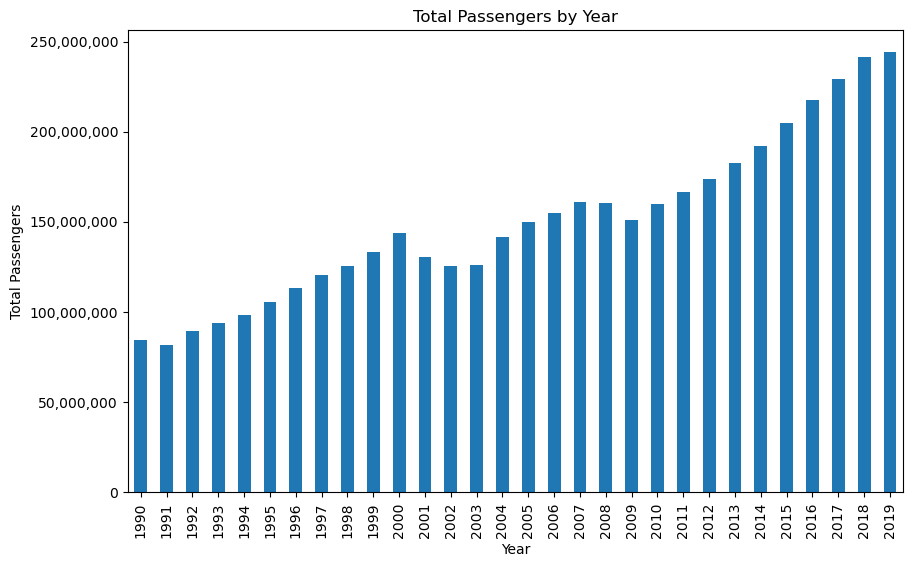

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
df_2_year.plot(kind='bar', ax=ax)

# Set the y-axis tick label format to standard decimal notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.xlabel('Year')
plt.ylabel('Total Passengers')
plt.title('Total Passengers by Year')
plt.show()


After we get insight per year in general, let's specify it into carriergroup, those are domestic and foreign flights.

In [16]:
# Grouped each data by year and carriergroup (domestic or foreign")
df_1_carriergroup = df_1.groupby(['Year','carriergroup'])['Total'].sum()
df_2_carriergroup = df_2.groupby(['Year','carriergroup'])['Total'].sum()

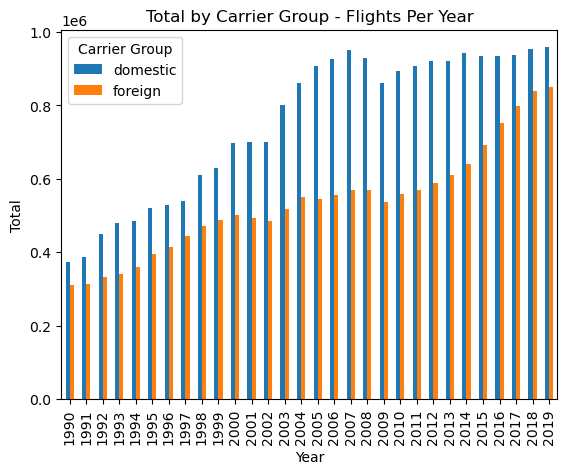

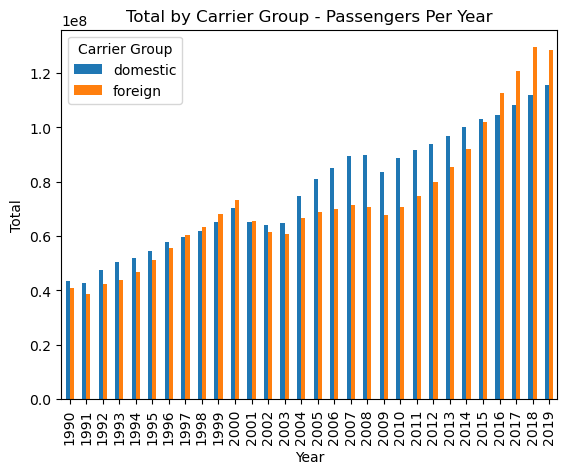

In [17]:
# Plotting the bar chart for df_1_carriergroup
df_1_carriergroup.unstack().plot(kind='bar')
plt.title('Total by Carrier Group - Flights Per Year')
plt.xlabel('Year')
plt.ylabel('Total')
plt.legend(title='Carrier Group')
plt.show()

# Plotting the bar chart for df_2_carriergroup
df_2_carriergroup.unstack().plot(kind='bar')
plt.title('Total by Carrier Group - Passengers Per Year')
plt.xlabel('Year')
plt.ylabel('Total')
plt.legend(title='Carrier Group')
plt.show()

Alright, let's analyze the data and make an interesting observation! Both the flights and passengers datasets, in general, show that domestic flights outnumber foreign flights. It seems like more people prefer to travel within their own country rather than flying abroad. That's a pretty cool finding, don't you think? It gives us a glimpse into the travel preferences of people in the US. So, let's continue exploring the data based on scheduled anc charter flight types! 🌍✈️

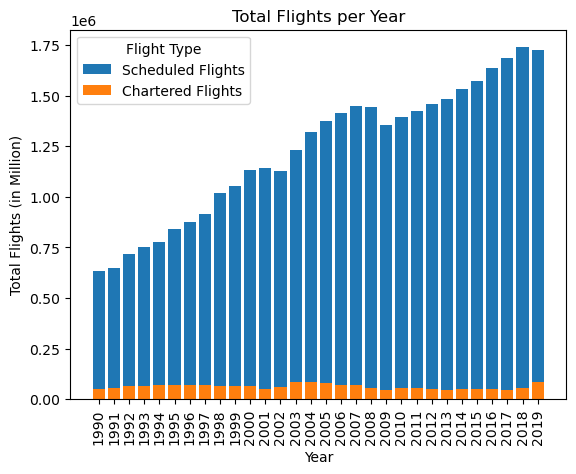

In [18]:
# Grouped Scheduled and Charter columns from the data by Year
df_1_scheduled = df_1.groupby(['Year'])['Scheduled'].sum()
df_1_chartered = df_1.groupby(['Year'])['Charter'].sum()
df_2_scheduled = df_2.groupby(['Year'])['Scheduled'].sum()
df_2_chartered = df_2.groupby(['Year'])['Charter'].sum()
# Plot each data to show the comparison of the data
plt.bar(df_1_scheduled.index, df_1_scheduled, label='Scheduled Flights')
plt.bar(df_1_chartered.index, df_1_chartered, label='Chartered Flights')
plt.title('Total Flights per Year')
xtick_positions = df_1_scheduled.index  # Use the existing index as tick positions
xtick_labels = df_1_scheduled.index  # Use the existing index as tick labels
plt.xticks(xtick_positions, xtick_labels, rotation=90)
plt.xlabel('Year')
plt.ylabel('Total Flights (in Million)')

plt.legend(title='Flight Type')

plt.show()

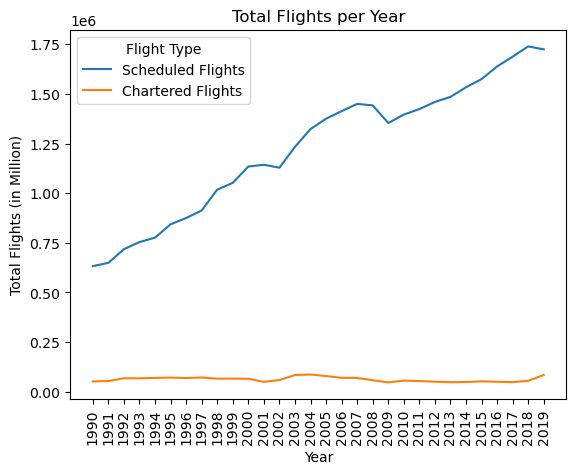

In [19]:
# Plot the data to show the trends per year
plt.plot(df_1_scheduled.index, df_1_scheduled, label='Scheduled Flights')
plt.plot(df_1_chartered.index, df_1_chartered, label='Chartered Flights')
plt.title('Total Flights per Year')
xtick_positions = df_1_scheduled.index  # Use the existing index as tick positions
xtick_labels = df_1_scheduled.index  # Use the existing index as tick labels
plt.xticks(xtick_positions, xtick_labels, rotation=90)
plt.xlabel('Year')
plt.ylabel('Total Flights (in Million)')

plt.legend(title='Flight Type')

plt.show()

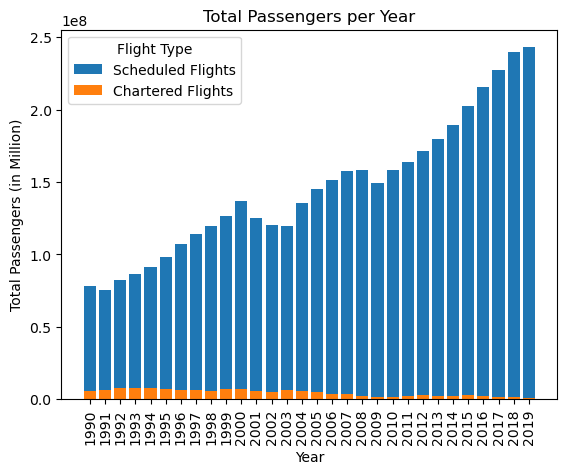

In [20]:
# Grouped Scheduled and Charter columns from the data by Year
plt.bar(df_2_scheduled.index, df_2_scheduled, label='Scheduled Flights')
plt.bar(df_2_chartered.index, df_2_chartered, label='Chartered Flights')
plt.title('Total Passengers per Year')
xtick_positions = df_2_scheduled.index  # Use the existing index as tick positions
xtick_labels = df_2_scheduled.index  # Use the existing index as tick labels
plt.xticks(xtick_positions, xtick_labels, rotation=90)
plt.xlabel('Year')
plt.ylabel('Total Passengers (in Million)')

plt.legend(title='Flight Type')

plt.show()

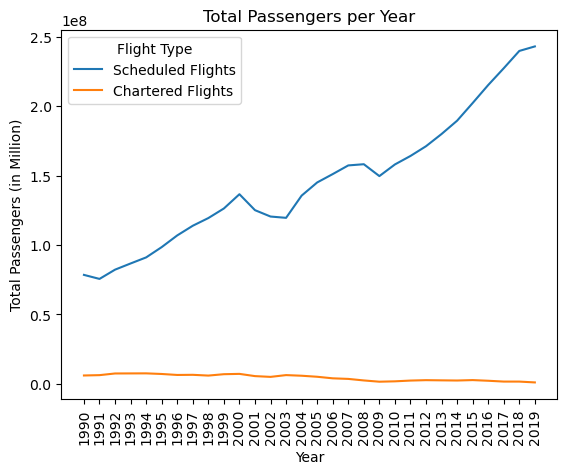

In [21]:
# Plot the data to show the trends per year
plt.plot(df_2_scheduled.index, df_2_scheduled, label='Scheduled Flights')
plt.plot(df_2_chartered.index, df_2_chartered, label='Chartered Flights')
plt.title('Total Passengers per Year')
xtick_positions = df_2_scheduled.index  # Use the existing index as tick positions
xtick_labels = df_2_scheduled.index  # Use the existing index as tick labels
plt.xticks(xtick_positions, xtick_labels, rotation=90)
plt.xlabel('Year')
plt.ylabel('Total Passengers (in Million)')

plt.legend(title='Flight Type')

plt.show()

Based on the previous charts, we can clearly see that scheduled flights have a significantly higher count compared to charter flights. Well, that totally makes sense, doesn't it? After all, when it comes to renting a flight, not everyone can afford it unless they're super rich, right? 😄 Moreover, the trend reveals an interesting pattern: the number of scheduled flights is showing a significant increase over time, while the count of charter flights remains relatively stable. It's intriguing to see how the demand for scheduled flights keeps rising. So, let's continue our analysis to know the busiest airport and route ✈️📈

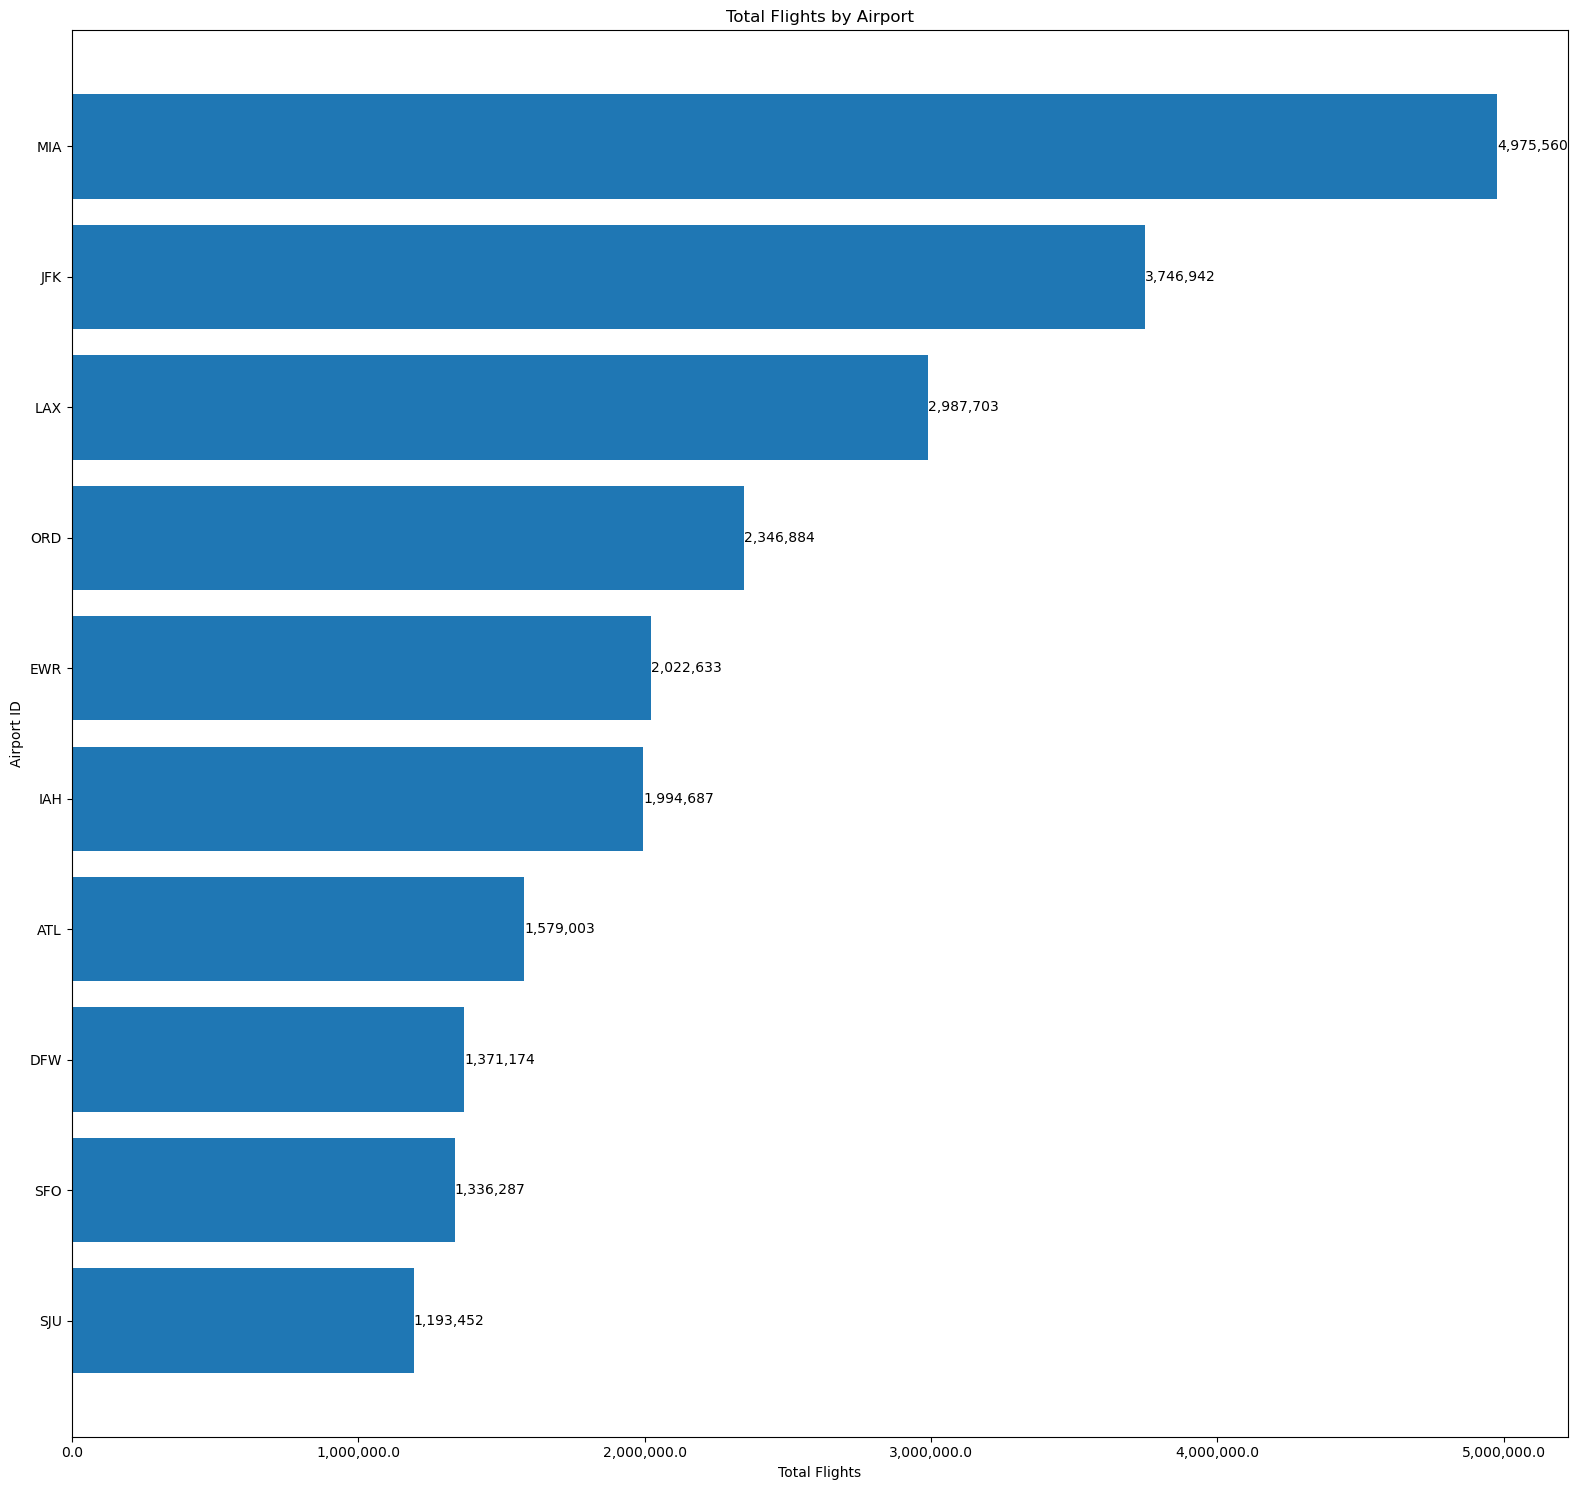

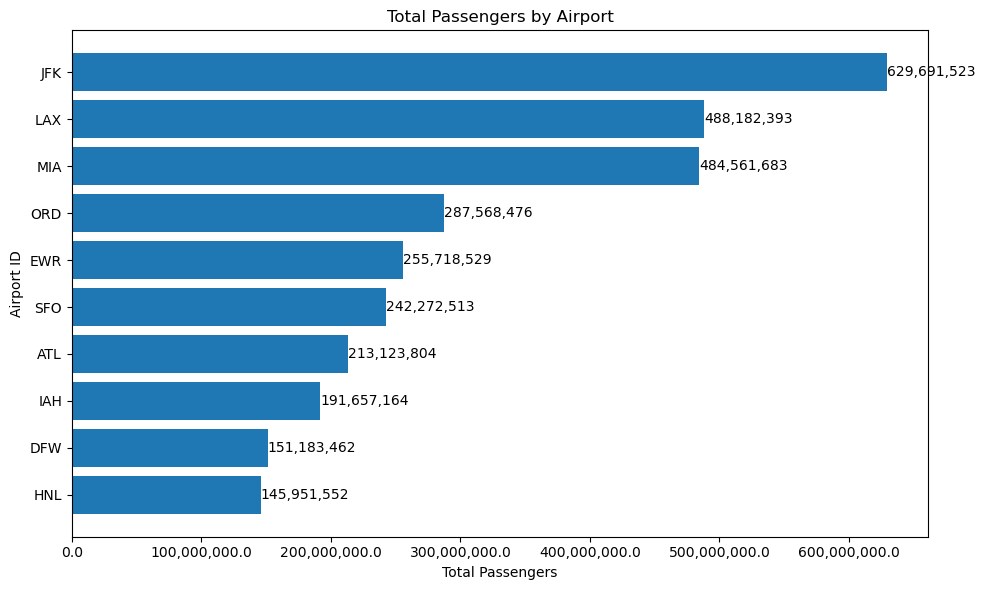

In [22]:
# Group the DataFrame by the airport ID column and calculate the sum of the Total column
df_1_airportbusy = df_1.groupby('usg_apt')['Total'].sum()
df_1_airportbusy = df_1_airportbusy.to_frame().reset_index()
# Sort the DataFrame by the total flights in descending order
df_1_airportbusy = df_1_airportbusy.sort_values(by='Total', ascending=False)

# Select the top ten airports
df_1_airportbusy = df_1_airportbusy.head(10)
df_1_airportbusy = df_1_airportbusy.sort_values(by='Total', ascending=True)
plt.figure(figsize=(16, 15))
bars = plt.barh(df_1_airportbusy['usg_apt'], df_1_airportbusy['Total'])
plt.xlabel('Total Flights')
plt.ylabel('Airport ID')
plt.title('Total Flights by Airport')

# Format the x-axis labels in normal format
plt.gca().xaxis.set_major_formatter('{:,}'.format)
for bar in bars:
    width = bar.get_width()+100
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:,.0f}', ha='left', va='center')
plt.tight_layout()
plt.show()


# Group the DataFrame by the airport ID column and calculate the sum of the Total column
df_2_airportbusy = df_2.groupby('usg_apt')['Total'].sum()
df_2_airportbusy = df_2_airportbusy.to_frame().reset_index()
# Sort the DataFrame by the total flights in descending order
df_2_airportbusy = df_2_airportbusy.sort_values(by='Total', ascending=False)

# Select the top ten airports
df_2_airportbusy = df_2_airportbusy.head(10)
df_2_airportbusy = df_2_airportbusy.sort_values(by='Total', ascending=True)
plt.figure(figsize=(10, 6))
bars_2 = plt.barh(df_2_airportbusy['usg_apt'], df_2_airportbusy['Total'])
plt.xlabel('Total Passengers')
plt.ylabel('Airport ID')
plt.title('Total Passengers by Airport')
# Format the x-axis labels in normal format
plt.gca().xaxis.set_major_formatter('{:,}'.format)
for bar in bars_2:
    width = bar.get_width()+100
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:,.0f}', ha='left', va='center')
plt.tight_layout()
plt.show()


plt.show()


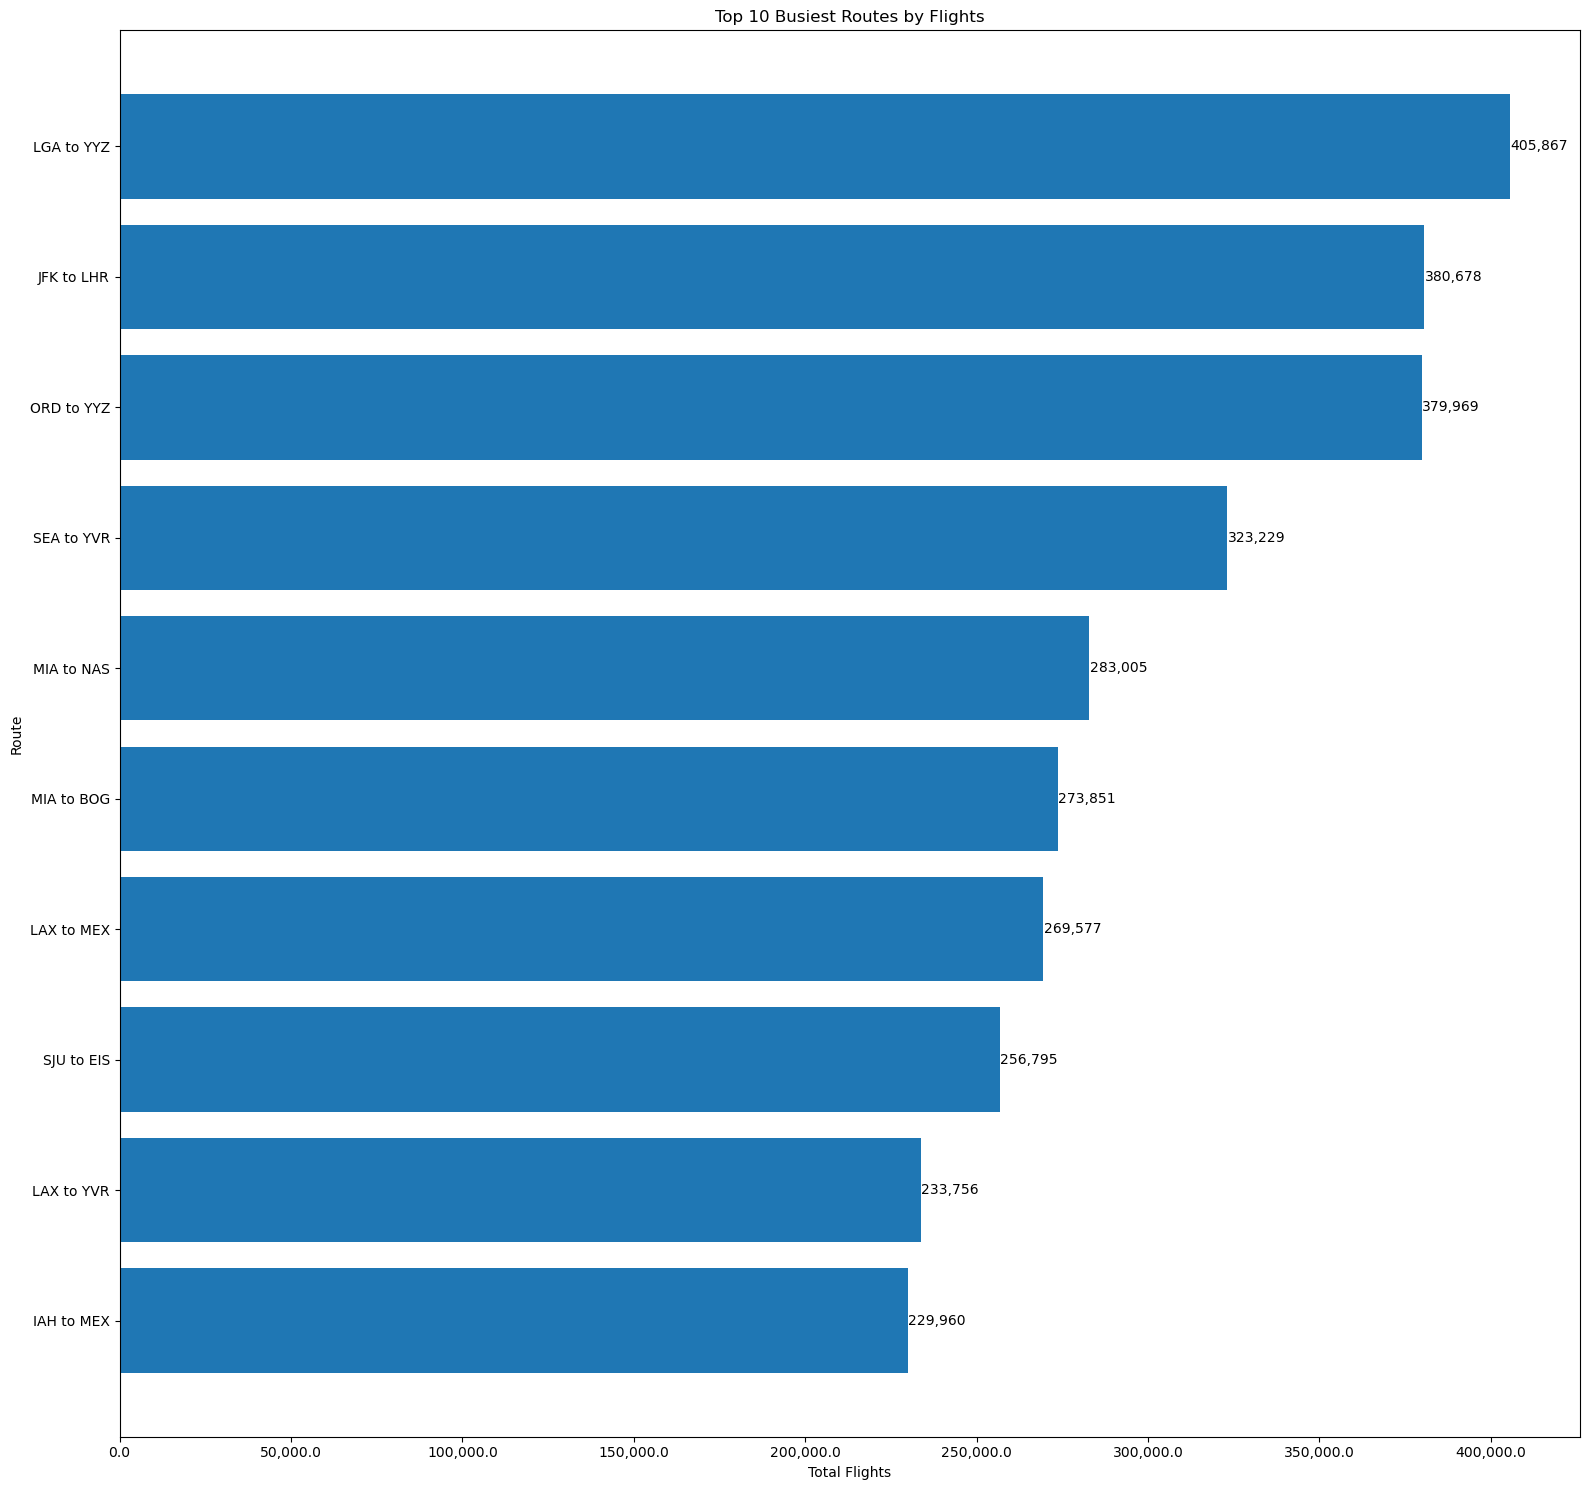

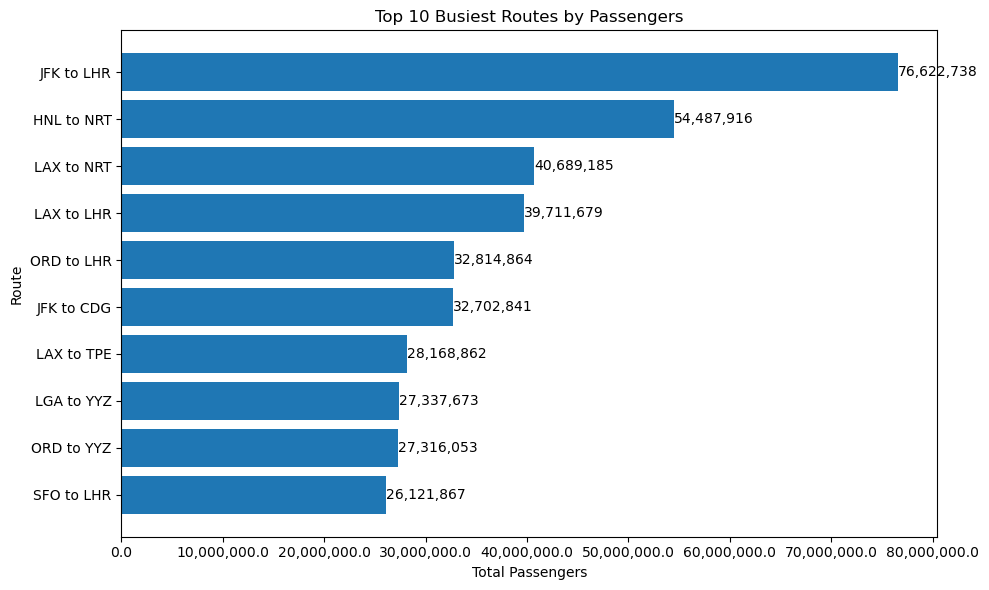

In [23]:
# Group the DataFrame by the airport ID column and calculate the sum of the Total column
df_1_routebusy = df_1.groupby(['usg_apt', 'fg_apt'])['Total'].sum()

# Sort the DataFrame by the total flights in descending order
df_1_routebusy = df_1_routebusy.sort_values(ascending=False)

# Select the top ten airports
df_1_routebusy = df_1_routebusy.head(10)
df_1_routebusy = df_1_routebusy.sort_values(ascending=True)

# Convert the index tuples to strings
df_1_routebusy.index = df_1_routebusy.index.map(lambda x: f'{x[0]} to {x[1]}')

# Create a horizontal bar plot for the top 10 busiest routes by flights
plt.figure(figsize=(16, 15))
bars = plt.barh(df_1_routebusy.index, df_1_routebusy.values)
plt.xlabel('Total Flights')
plt.ylabel('Route')
plt.title('Top 10 Busiest Routes by Flights')

# Format the x-axis labels in normal format
plt.gca().xaxis.set_major_formatter('{:,}'.format)

# Add the flight count values on the bars
for bar in bars:
    width = bar.get_width() + 100
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:,.0f}', ha='left', va='center')

plt.tight_layout()
plt.show()


# Group the DataFrame by the airport ID column and calculate the sum of the Total column
df_2_routebusy = df_2.groupby(['usg_apt', 'fg_apt'])['Total'].sum()

# Sort the DataFrame by the total flights in descending order
df_2_routebusy = df_2_routebusy.sort_values(ascending=False)

# Select the top ten airports
df_2_routebusy = df_2_routebusy.head(10)
df_2_routebusy = df_2_routebusy.sort_values(ascending=True)

# Convert the index tuples to strings
df_2_routebusy.index = df_2_routebusy.index.map(lambda x: f'{x[0]} to {x[1]}')

# Create a horizontal bar plot for the top 10 busiest routes by passengers
plt.figure(figsize=(10, 6))
bars = plt.barh(df_2_routebusy.index, df_2_routebusy.values)
plt.xlabel('Total Passengers')
plt.ylabel('Route')
plt.title('Top 10 Busiest Routes by Passengers')

# Format the x-axis labels in normal format
plt.gca().xaxis.set_major_formatter('{:,}'.format)

# Add the passenger count values on the bars
for bar in bars:
    width = bar.get_width() + 100
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:,.0f}', ha='left', va='center')

plt.tight_layout()
plt.show()


alright then! Now that we have the total flights and passengers data, let's classify the airports based on quartiles. This will help us categorize them into different levels: low, normal, busy, and super busy airports. It's a cool way to understand the distribution and activity levels of airports across the US. So, let's dive into it and get ready to classify those airports like pros! 🛫📊

In [24]:
# Calculate the quartiles
quartiles_airport_1 = df_1_airportbusy['Total'].quantile([0.25, 0.5, 0.75])
quartiles_airport_2 = df_2_airportbusy['Total'].quantile([0.25, 0.5, 0.75])

# Assign quartile values to variables
first_quartile_1 = quartiles_airport_1[0.25]
second_quartile_1 = quartiles_airport_1[0.5]
third_quartile_1 = quartiles_airport_1[0.75]

first_quartile_2 = quartiles_airport_2[0.25]
second_quartile_2 = quartiles_airport_2[0.5]
third_quartile_2 = quartiles_airport_2[0.75]

# Define the classification thresholds based on quartiles
normal_threshold_1 = first_quartile_1
busy_threshold_1 = second_quartile_1
superbusy_threshold_1 = third_quartile_1

normal_threshold_2 = first_quartile_2
busy_threshold_2 = second_quartile_2
superbusy_threshold_2 = third_quartile_2

# Create a new column 'Status Based on Flights' to store the classification based on total flights
df_1_airportbusy['Status Based on Flights'] = ''

# Classify airports based on total number of flights using quartiles
df_1_airportbusy.loc[df_1_airportbusy['Total'] >= superbusy_threshold_1, 'Status Based on Flights'] = 'Super Busy'
df_1_airportbusy.loc[(df_1_airportbusy['Total'] < superbusy_threshold_1) & (df_1_airportbusy['Total'] >= busy_threshold_1), 'Status Based on Flights'] = 'Busy'
df_1_airportbusy.loc[(df_1_airportbusy['Total'] < busy_threshold_1) & (df_1_airportbusy['Total'] >= normal_threshold_1), 'Status Based on Flights'] = 'Normal'
df_1_airportbusy.loc[df_1_airportbusy['Total'] < normal_threshold_1, 'Status Based on Flights'] = 'Low'

# Create a new column 'Status Based on Passengers' to store the classification based on total passengers
df_2_airportbusy['Status Based on Passengers'] =''
# Classify airports based on total number of passengers using quartiles
df_2_airportbusy.loc[df_2_airportbusy['Total'] >= superbusy_threshold_2, 'Status Based on Passengers'] = 'Super Busy'
df_2_airportbusy.loc[(df_2_airportbusy['Total'] < superbusy_threshold_2) & (df_2_airportbusy['Total'] >= busy_threshold_2), 'Status Based on Passengers'] = 'Busy'
df_2_airportbusy.loc[(df_2_airportbusy['Total'] < busy_threshold_2) & (df_2_airportbusy['Total'] >= normal_threshold_2), 'Status Based on Passengers'] = 'Normal'
df_2_airportbusy.loc[df_2_airportbusy['Total'] < normal_threshold_2, 'Status Based on Passengers'] = 'Low'

# Print the updated DataFrame with flight status
print(df_1_airportbusy)
print(df_2_airportbusy)


    usg_apt    Total Status Based on Flights
865     SJU  1193352                     Low
850     SFO  1336187                     Low
212     DFW  1371074                     Low
56      ATL  1578903                  Normal
416     IAH  1994587                  Normal
284     EWR  2022533                    Busy
701     ORD  2346784                    Busy
484     LAX  2987603              Super Busy
450     JFK  3746842              Super Busy
570     MIA  4975460              Super Busy
    usg_apt      Total Status Based on Passengers
309     HNL  145951452                        Low
167     DFW  151183362                        Low
335     IAH  191657064                        Low
39      ATL  213123704                     Normal
698     SFO  242272413                     Normal
220     EWR  255718429                       Busy
568     ORD  287568376                       Busy
467     MIA  484561583                 Super Busy
393     LAX  488182293                 Super Busy
366  

In [25]:
# Create new table to classify airport based on total flight and passengers
df_1_airportbusy = df_1_airportbusy.groupby('Status Based on Flights')['Total'].sum()
df_2_airportbusy = df_2_airportbusy.groupby('Status Based on Passengers')['Total'].sum()

In [26]:
# Change the series to dataframe 
df_1_airportbusy = df_1_airportbusy.to_frame().reset_index()
df_2_airportbusy = df_2_airportbusy.to_frame().reset_index()

In [27]:
# sort each dataframe based on Total by ascending
df_1_airportbusy = df_1_airportbusy.sort_values('Total', ascending=True)
df_2_airportbusy = df_2_airportbusy.sort_values('Total', ascending=True)

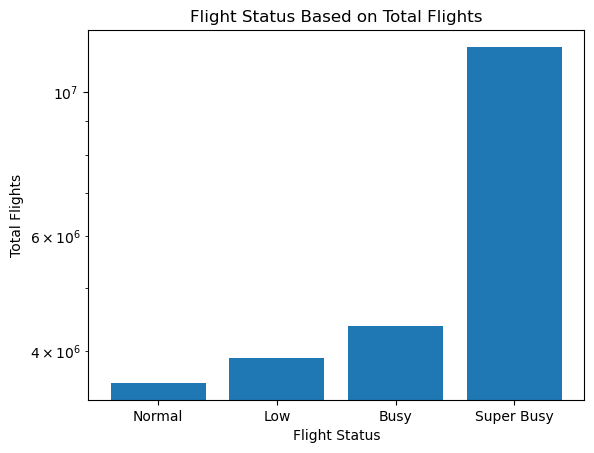

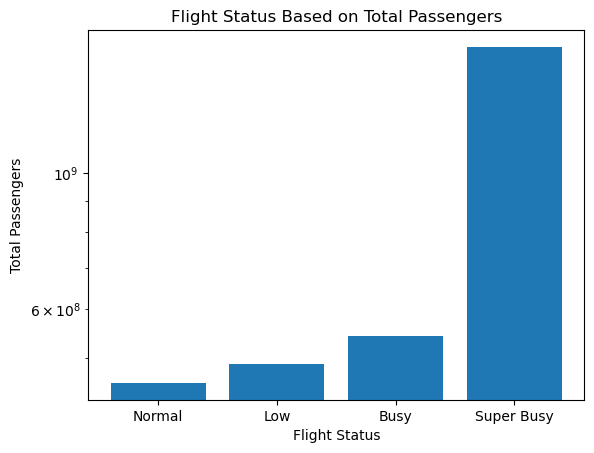

In [28]:
# Create bar chart for each dataframe to show the status comparision 
plt.bar(df_1_airportbusy['Status Based on Flights'], df_1_airportbusy['Total'])
plt.title('Flight Status Based on Total Flights')
plt.ylabel('Total Flights')
plt.xlabel('Flight Status')
plt.yscale('log')
plt.show()
plt.bar(df_2_airportbusy['Status Based on Passengers'], df_2_airportbusy['Total'])
plt.title('Flight Status Based on Total Passengers')
plt.ylabel('Total Passengers')
plt.xlabel('Flight Status')
plt.yscale('log')
plt.show()

As we can see, the majority of airports fall into the super busy category. And honestly, that makes perfect sense, doesn't it? I mean, when was the last time you came across a completely quiet or empty airport? It's pretty rare, right? Airports are bustling hubs of activity most of the time.

But hey, before we jump to conclusions, let's explore the correlation between the number of passengers and flights. This will give us insights into how these two variables are related. Are they increasing together over time? Or is there a different pattern at play? Let's find out by calculating the correlation between passengers and flights. It's going to be an exciting journey into understanding the dynamics of air travel! 🛫🔁📈

In [29]:
# Create new dataframe to be prepared to do correlation test
df_1_airport_3 = df_1.groupby('usg_apt')['Total'].sum()
df_1_airport_3 = df_1_airport_3.to_frame().reset_index()
df_2_airport_3 = df_2.groupby('usg_apt')['Total'].sum()
df_2_airport_3 = df_2_airport_3.to_frame().reset_index()
# Merge dataframe with inner join to show only the related values
merged_passengers_airport = df_1_airport_3.merge(df_2_airport_3, on='usg_apt', how='inner')

In [30]:
correlation = merged_passengers_airport['Total_x'].corr(merged_passengers_airport['Total_y'])
correlation

0.9610209398641381

Awesome! The correlation between the total number of passengers and the total number of flights is calculated to be 0.9610209398641381. That's a strong positive correlation! What does this mean? Well, it indicates that as the total number of passengers increases, the total number of flights also tends to increase. So, it seems like there's a direct relationship between passenger demand and flight activity. When more people are traveling, airlines respond by scheduling more flights to accommodate the increased passenger volume.

This finding aligns with our intuition, right? It makes sense that as more passengers are flying, there's a need for more flights to cater to their travel needs. It's fascinating to see this correlation and understand how the dynamics of passenger demand influence the flight activity.

So, with this strong positive correlation, we can confidently say that as the total number of passengers increases over time, we can expect a corresponding increase in the total number of flights. Exciting stuff! 📈✈️

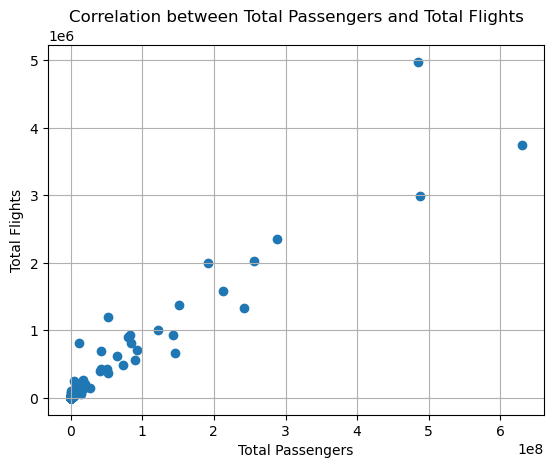

In [31]:
# Create a scatter plot
plt.scatter(merged_passengers_airport['Total_y'], merged_passengers_airport['Total_x'])
plt.title('Correlation between Total Passengers and Total Flights')
plt.xlabel('Total Passengers')
plt.ylabel('Total Flights')
plt.grid(True)
plt.show()

Alright, let's wrap up this session with a mmap chart! We'll create a map chart showcasing the busiest airports. So, grab a seat, sit tight, and get ready for some visual awesomeness!

In [32]:
import folium
from geopy.geocoders import Nominatim

# Sort the DataFrame by total flights in descending order and select the top ten rows
df_sorted = df_1_airport_3.sort_values(by='Total', ascending=False).head(10)

# Geocode airport codes to get latitude and longitude coordinates
geolocator = Nominatim(user_agent="airport_geocoder")

df_sorted['location'] = df_sorted['usg_apt'].apply(lambda code: geolocator.geocode(code).point)

# Create a map centered on the United States
map_chart = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Add markers for the airports
for index, row in df_sorted.iterrows():
    airport = row['usg_apt']
    total_flights = row['Total']
    airport_location = row['location']
    
    # Extract latitude and longitude from Point object and convert to list
    lat, lon, _ = airport_location
    location_list = [lat, lon]
    
    # Create a marker for each airport and add it to the map
    folium.Marker(
        location=location_list,
        popup=f"{airport}<br>Total Flights: {total_flights}",
        icon=folium.Icon(icon='plane')
    ).add_to(map_chart)

# Display the map in the notebook
map_chart


# **Summary**

That's it folks! you're not tired right? So, let's wrap up our analysis and summarize our findings in a nutshell:

1. Both the total number of flights and passengers show an increasing trend over time, and they have a positive correlation. As passenger numbers rise, so do the number of flights. It's a clear sign of a growing aviation industry.

2. Scheduled flights take the crown over chartered flights. Scheduled flights are on the rise, while chartered flights seem to be stagnant. It's understandable since not everyone can afford to charter a flight, right?

3. Domestic flights dominate over foreign flights. People in the US prefer to travel within their own country rather than flying abroad. It's all about exploring the beautiful destinations within our borders.

4. When it comes to the busiest airports, JFK (John F. Kennedy International Airport) takes the lead in terms of flights, while MIA (Miami International Airport) tops the list in terms of passengers. These airports are buzzing with activity, serving as major hubs for travel.

And there you have it, folks! We've analyzed our data with countless rows and uncovered some fascinating insights. Now it's time to take a well-deserved rest before diving into another exciting data analysis adventure! Catch you on the flip side! 📊✈️😴